#**1 Introduccion**
En este taller, trabajaremos con un conjunto de datos relacionado con la aprobaci´on de pr´estamos. El
objetivo es aplicar t´ecnicas de an´alisis de datos y Machine Learning para entender c´omo los distintos
factores influyen en la decisi´on de aprobaci´on o rechazo del pr´estamo.
El conjunto de datos contiene las siguientes columnas:

• loan id: Identificador ´unico del pr´estamo

• no of dependents: N´umero de dependientes del solicitante

• education: Nivel educativo del solicitante (Graduate o Not Graduate)

• self employed: Si el solicitante es autoempleado (Yes o No)

• income annum: Ingreso anual del solicitante en unidades monetarias

• loan amount: Monto solicitado para el pr´estamo

• loan term: Duraci´on del pr´estamo en a˜nos

• cibil score: Puntaje CIBIL del solicitante

• residential assets value: Valor de los activos residenciales del

• commercial assets value: Valor de los activos comerciales del solicitante

• luxury assets value: Valor de los activos de lujo del solicitante

• bank asset value: Valor de los activos bancarios del solicitante

• loan status: Estado del pr´estamo (Aprobado o Rechazado)

In [140]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv

--2025-04-30 22:27:33--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv [following]
--2025-04-30 22:27:33--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.6’

loan_approval_datas 100%[===========

In [141]:
!pip install imblearn
!pip install numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [142]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#**2 Preguntas Te´oricas**

Responde las siguientes preguntas relacionadas con los conceptos de an´alisis de datos, estad´ısticas y
Machine Learning.

#**2.1 Pregunta 1: An´alisis Exploratorio de Datos (EDA)**
¿Qu´e pasos seguir´ıas para realizar un an´alisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizar´ıas

**Para comenzar a trabajar con Machine Learning, primero se deben incorporar las bibliotecas requeridas y luego cargar y examinar el conjunto de datos que se utilizará.**

**Para obtener una visión inicial del dataframe, incluyendo algunas filas, el tipo de información que contiene cada columna y un resumen estadístico básico, se emplearán las funciones head, info y describe.**

**Finalmente, es importante detectar la presencia de valores nulos o ausentes en los datos para posteriormente decidir si eliminarlos o imputarlos utilizando la media.**

#**2.2 Pregunta 2: Preprocesamiento de Datos**
Imagina que uno de los datos contiene valores faltantes o at´ıpicos (outliers). ¿Qu´e t´ecnicas utilizar´ıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta

**Para manejar los datos faltantes una vez identificados, se podría optar por eliminar las filas que los contengan usando la función .dropna. Otra alternativa sería completar estos valores ausentes empleando la función .fillna y sustituyéndolos por un valor estimado, la mediana o la media, siendo esta última la más común. Asimismo, existe la opción de reemplazar los valores nulos con un cero.**

#**2.3 Pregunta 3: Modelos de Clasificaci´on**
En este caso, el objetivo es predecir si un pr´estamo ser´a aprobado o rechazado en funci´on de las caracter´ısticas del solicitante. ¿Qu´e tipo de modelo de clasificaci´on usar´ıas y por qu´e? Discute las ventajas y
desventajas de este modelo.

**Dado que la variable a predecir tiene solo dos posibles resultados, la Regresión Logística se presenta como un modelo eficaz. Su sencilla implementación es una ventaja notable, al igual que su capacidad para estimar la probabilidad de un evento, como si un prestamo sera aprobado o rechazado. No obstante, es importante considerar que su desempeño puede deteriorarse ante la presencia de datos faltantes en el conjunto de datos y que la naturaleza de la relación entre las variables predictoras y el resultado esperado influye significativamente en la calidad de sus predicciones.**

#**2.4 Pregunta 4: Desbalanceo de Clases**
¿Qu´e es el desbalanceo de clases y por qu´e es un problema al entrenar un modelo de clasificaci´on? ¿Qu´e
t´ecnicas utilizar´ıas para abordar este problema, como SMOTE?

**Cuando una categoría dentro de un conjunto de datos posee significativamente más ejemplos que otra, se presenta un desequilibrio de clases. Esta disparidad puede generar un sesgo en el modelo predictivo, conduciendo a errores en la predicción de la clase minoritaria y distorsionando las métricas de evaluación del modelo. Para abordar este inconveniente, se pueden emplear estrategias como SMOTE, que crea datos sintéticos para la clase subrepresentada; la eliminación aleatoria de ejemplos de la clase mayoritaria; o la selección de modelos, como los árboles de decisión, que son menos sensibles a la desigualdad en las clases.**

#**2.5 Pregunta 5: Overfitting**
¿Qu´e es el overfitting y c´omo puedes detectarlo en un modelo de Machine Learning? Explica qu´e medidas
tomar´ıas para evitar el sobreajuste y mejorar la capacidad de generalizaci´on de tu modelo.

**El sobreajuste ocurre cuando un modelo de aprendizaje automático se adapta en exceso a los detalles y el ruido del conjunto de datos de entrenamiento. En esencia, el modelo memoriza los datos de entrenamiento en lugar de aprender patrones generales, lo que dificulta su capacidad para generalizar y realizar predicciones precisas con datos nuevos o no vistos. Una señal clara de sobreajuste es una brecha significativa entre el rendimiento del modelo en los datos de entrenamiento (alto) y su rendimiento en los datos de prueba (bajo).**

**Para mitigar el sobreajuste, se pueden implementar estrategias como aumentar la cantidad de datos de entrenamiento, lo que expone al modelo a una mayor variedad de patrones, o simplificar el modelo, reduciendo la cantidad de características o la complejidad de su estructura para evitar que se ajuste a detalles espurios.**

#**3 Ejercicios Pr´acticos**
#**3.1 Ejercicio 1: An´alisis Descriptivo**
Usa la tabla de datos proporcionada para realizar un an´alisis descriptivo de las variables num´ericas.
Responde a las siguientes preguntas:

• ¿Cu´al es el promedio de los ingresos anuales (income annum) de los solicitantes?
**5.059124e+06**

• ¿Cu´al es el puntaje CIBIL promedio de los solicitantes cuyo pr´estamo fue aprobado? **703.4619728915662**

• ¿Cu´al es la duraci´on promedio de los pr´estamos (loan term)?
**10.900445069102835 años**

In [144]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [103]:
average_cibil_approved = df[df[' loan_status'] == ' Approved'][' cibil_score'].mean()
print(f"The average CIBIL score for approved loans is: {average_cibil_approved}")

The average CIBIL score for approved loans is: 703.4619728915662


In [104]:
duracion_promedio = df[' loan_term'].mean()
print(f"La duración promedio de los préstamos es: {duracion_promedio} años")

La duración promedio de los préstamos es: 10.900445069102835 años


#**3.2 Ejercicio 2: Preprocesamiento de Datos**
Realiza los siguientes pasos de preprocesamiento:

• Convierte la variable education en una variable binaria (0: Not Graduate, 1: Graduate).

• Convierte la variable self employed en una variable binaria (0: No, 1: Yes).

• Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente

In [145]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [146]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [148]:
print(df[df[" education"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [149]:
df[" education"] = df[" education"].astype(str).str.strip().str.lower().map({
    "graduate": 1,
    "not graduate": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [151]:
df[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [152]:
print(df[df[" self_employed"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [153]:
df[" self_employed"] = df[" self_employed"].astype(str).str.strip().str.lower().map({
    "yes": 1,
    "no": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


#**3.3 Ejercicio 3: An´alisis de Correlaci´on**
Realiza un an´alisis de correlaci´on entre las siguientes variables:

• income annum y loan amount

**El coeficiente de correlación de 0.93 indica una relación lineal positiva muy fuerte entre income annum (ingresos anuales) y loan amount (monto del préstamo). Esto significa que a medida que aumentan los ingresos anuales, también tiende a aumentar el monto del préstamo solicitado**

• cibil score y loan amount

**El coeficiente de correlación de -0.02 indica una relación lineal negativa muy débil entre cibil score (puntuación CIBIL) y loan amount (monto del préstamo). Esto significa que Existe una ligera tendencia a que a medida que aumenta la puntuación CIBIL, el monto del préstamo solicitado disminuya**


• residential assets value y commercial assets value

**El coeficiente de correlación de 0.41 indica una relación lineal positiva moderada entre residential assets value (valor de los activos residenciales) y commercial assets value (valor de los activos comerciales). Esto significa que existe una tendencia a que las personas con mayores valores de activos residenciales también tengan mayores valores de activos comerciales**

Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿C´omo afectar´ıa
esto a un modelo predictivo?

**Existen correlaciones fuertes entre loan status y cibil score y entre income amount y luxury assets**

**Las variables que muestran una fuerte correlación pueden ser valiosas para predecir el resultado deseado, ya que ofrecen información significativa sobre él.aunque, es crucial prestar atención a la situación en la que dos o más variables predictoras están altamente relacionadas entre sí. Esta alta correlación entre predictores puede comprometer la estabilidad e interpretación del modelo predictivo.**

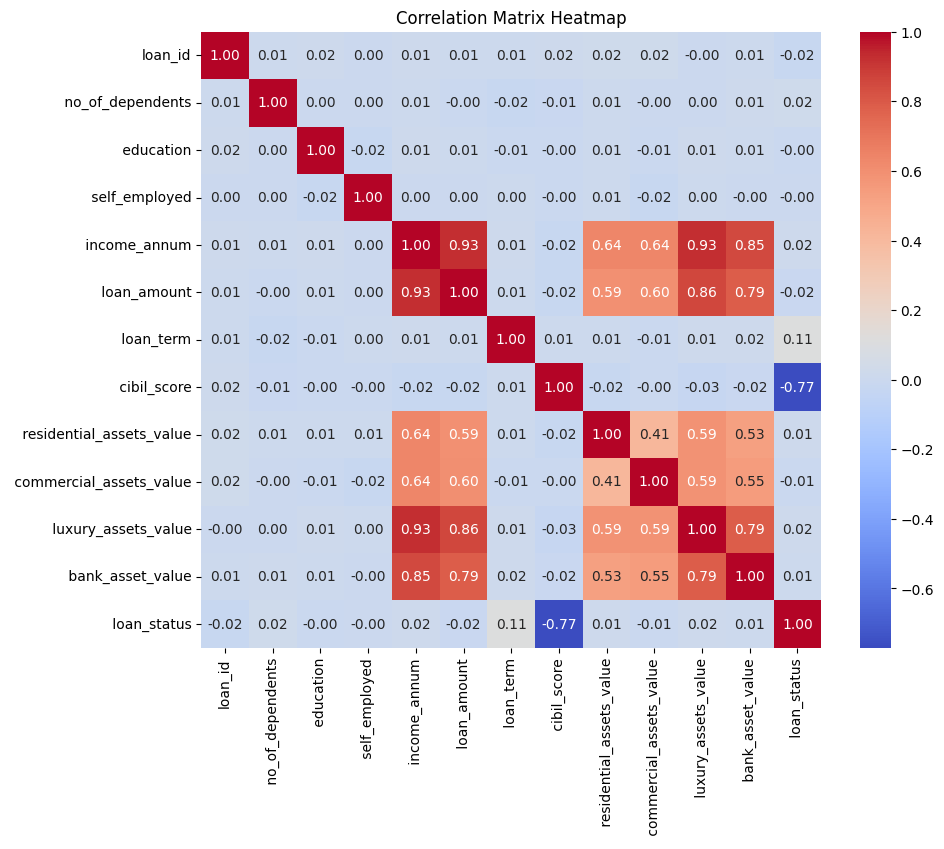

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

df[' loan_status'] = pd.factorize(df[' loan_status'])[0]
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#**3.4 Ejercicio 4: Comparaci´on de Modelos de Clasificaci´on**
Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y Arbol de ´
Decisi´on para predecir el estado del pr´estamo (loan status). Compara los modelos utilizando la
m´etrica ROC AUC. Para esto, sigue los pasos:

• Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).

• Divide los datos en un conjunto de entrenamiento y uno de prueba.

• Entrena los modelos de Regresi´on Log´ıstica y Arbol de Decisi´on ´ .

• Hay alguna evidencia de overfitting si/no .

• Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.

• Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
modelos.

Discute los resultados obtenidos. ¿Cu´al modelo es el m´as adecuado para este problema? ¿Por qu´e?

**El modelo mas acertado es el de regresion logistica, pues tiene la metrica ROC AUC mas alta, lo que sugiere que este modelo es mejor para predecir la variable loan status**

In [159]:
X = df[[" cibil_score", " loan_term"]]
y = df[" loan_status"]

X.isnull().sum()

,0
cibil_score,0
loan_term,0


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (3415, 2)
Dimensiones del conjunto de prueba: (854, 2)
Distribución de clases en entrenamiento (proporciones):
 loan_status
0    0.622255
1    0.377745
Name: proportion, dtype: float64


In [161]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
 loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [163]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]

logreg_roc_auc = roc_auc_score(y_test, logreg_probs)
tree_roc_auc = roc_auc_score(y_test, tree_probs)

print(f"Logistic Regression ROC AUC: {logreg_roc_auc}")
print(f"Decision Tree ROC AUC: {tree_roc_auc}")


Logistic Regression ROC AUC: 0.9737949893011026
Decision Tree ROC AUC: 0.9618862710115267


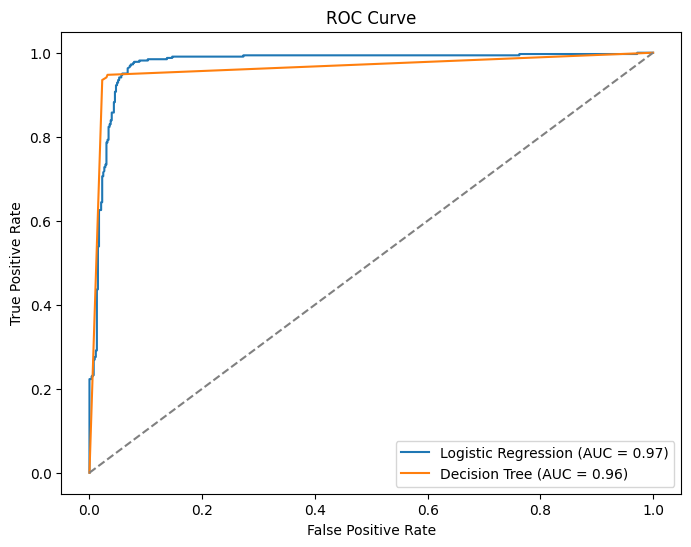

In [168]:
plt.figure(figsize=(8, 6))
plt.plot(roc_curve(y_test, logreg_probs)[0], roc_curve(y_test, logreg_probs)[1], label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(roc_curve(y_test, tree_probs)[0], roc_curve(y_test, tree_probs)[1], label=f"Decision Tree (AUC = {tree_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [164]:
y_pred_logreg_train = logreg_model.predict(X_train)
y_pred_logreg_test = logreg_model.predict(X_test)

y_pred_tree_train = tree_model.predict(X_train)
y_pred_tree_test = tree_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_logreg_train = accuracy_score(y_train, y_pred_logreg_train)
accuracy_logreg_test = accuracy_score(y_test, y_pred_logreg_test)

accuracy_tree_train = accuracy_score(y_train, y_pred_tree_train)
accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)

print("Logistic Regression:")
print(f"Training Accuracy: {accuracy_logreg_train}")
print(f"Testing Accuracy: {accuracy_logreg_test}")

print("\nDecision Tree:")
print(f"Training Accuracy: {accuracy_tree_train}")
print(f"Testing Accuracy: {accuracy_tree_test}")


Logistic Regression:
Training Accuracy: 0.9214117647058824
Testing Accuracy: 0.9437939110070258

Decision Tree:
Training Accuracy: 0.987764705882353
Testing Accuracy: 0.9613583138173302


#**3.5 Ejercicio 5: Evaluaci´on del Desempe˜no del Modelo**
Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall,
F1 y la matriz de confusi´on. Responde las siguientes preguntas:

• ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.
**Después de ajustar el modelo mediante el balanceo de clases, ambos presentan una precisión equivalente basada en su precisión de 100. Aunque basado en las caracteristicas de cada modelo, el de r4egresion logistica nos da la probabilidad de que alguien se salga del banco y es mas simple de interpretar**

• ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?
**El desequilibrio afecta moderadamente estas métricas dado que se restringen a valorar la habilidad del modelo para diferenciar entre clases. Otras métricas como la exactitud pueden ser engañosas al presentar valores elevados incluso en situaciones donde el modelo no ha sido equilibrado; mientras que el F1 puede ser la medida ideal de precisión y recall, ofreciendo una valoración más balanceada del rendimiento en situaciones de desequilibrio.**


• ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria
**Balancear las clases y establecer cómo esto podría influir positivamente o negativamente en la capacidad predictiva del modelo en todas las situaciones.**

In [169]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

y_pred_test = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test)
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test)
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1-score: {f1:.2f}")


Accuracy del modelo: 0.94
Matriz de Confusión:


array([[504,  27],
       [ 21, 302]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       531
           1       0.92      0.93      0.93       323

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

Precisión: 0.92
Recall: 0.93
F1-score: 0.93


In [170]:
y_pred_test_tree = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test_tree)
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test_tree)
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test_tree)
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test_tree)
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test_tree)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test_tree)
print(f"F1-score: {f1:.2f}")

Accuracy del modelo: 0.96
Matriz de Confusión:


array([[519,  12],
       [ 21, 302]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.96      0.93      0.95       323

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854

Precisión: 0.96
Recall: 0.93
F1-score: 0.95


**4 Reflexi´on Cr´ıtica**
Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:

• ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados? **Con la limpieza y el conteo de datos nulos para evitar Nan**

• ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos? **No implementar SMOTE en el modelo y evaluar su rendimiento global con datos desbalanceados, o utilizar variables distintas para valorar su rendimiento.**

• Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo de clasificaci´on? **Es posible tomar en cuenta factores como la regularidad en el uso de los productos bancarios, el grado general de satisfacción del cliente con el servicio proporcionado y si cuenta con productos bancarios de otras entidades.**

• ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado? **El aprendizaje del modelo y su evaluación tanto con datos desbalanceados como con los balanceados**

• ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con SMOTE? **Se puede intuir que la implementación de la funcion SMOTE en la sincronización de clases podría haber detenido el modelo.**

• ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas implementar´ıas para mejorar la capacidad de generalizaci´on? **Intentaría incrementar la cantidad de datos inicial y efectuaría una estratificación al dividir los datos utilizados en el proceso de aprendizaje del modelo.**